In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from google.colab import drive
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/Stunting Prediction/data_balita.csv')
data.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted


In [ ]:
# Mengecek Missing Value
data.isnull().sum()

Umur (bulan)         0
Jenis Kelamin        0
Tinggi Badan (cm)    0
Status Gizi          0
dtype: int64

In [ ]:
# Mengecek Tipe Data
data.dtypes

Umur (bulan)           int64
Jenis Kelamin         object
Tinggi Badan (cm)    float64
Status Gizi           object
dtype: object

In [ ]:
# Mengecek Nilai Unique
data.nunique()

Umur (bulan)           61
Jenis Kelamin           2
Tinggi Badan (cm)    6800
Status Gizi             4
dtype: int64

In [ ]:
# Mengecek Statistik Data
data.describe()

,Umur (bulan),Tinggi Badan (cm)
count,120999.000000,120999.000000
mean,30.173803,88.655434
std,17.575119,17.300997
min,0.000000,40.010437
25%,15.000000,77.000000
50%,30.000000,89.800000
75%,45.000000,101.200000
max,60.000000,128.000000


In [ ]:
# Mengkodekan Jenis Kelamin
data['Jenis Kelamin'] = data['Jenis Kelamin'].map({'laki-laki':0,'perempuan':1})

# Mengkodekan Status Gizi
data['Status Gizi'] = data['Status Gizi'].map({'severely stunted':0, 'stunted':1, 'normal':2, 'tinggi':3})
data.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,0,44.591973,1
1,0,0,56.705203,3
2,0,0,46.863358,2
3,0,0,47.508026,2
4,0,0,42.743494,0


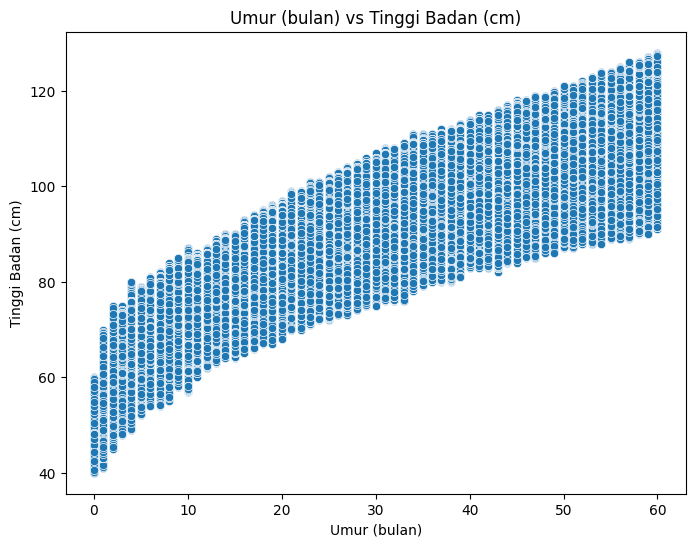

In [ ]:
# Visualisasi Data
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Umur (bulan)', y='Tinggi Badan (cm)')
plt.title('Umur (bulan) vs Tinggi Badan (cm)')
plt.xlabel('Umur (bulan)')
plt.ylabel('Tinggi Badan (cm)')
plt.show()

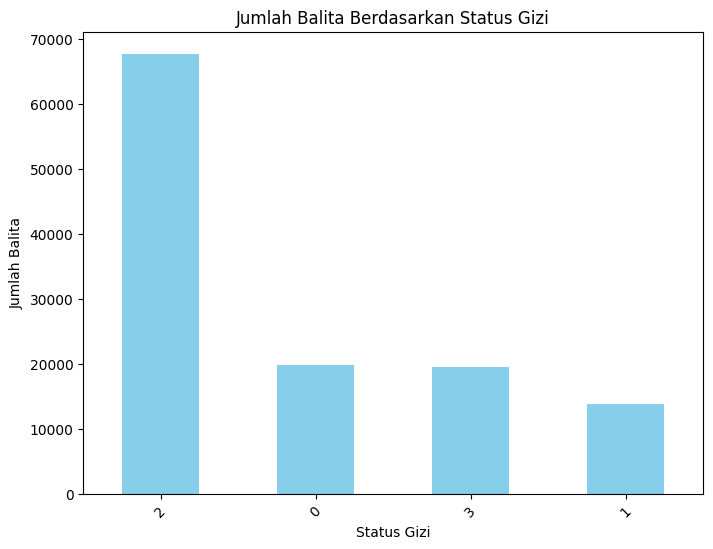

In [ ]:
status_counts = df['Status Gizi'].value_counts()

# Kode Pengelompokan
# 0:Severly Stunted ; 1:Stunted ; 2:Normal ; 3:Tinggi

# Membuat bar plot
plt.figure(figsize=(8, 6))
status_counts.plot(kind='bar', color='skyblue')
plt.title('Jumlah Balita Berdasarkan Status Gizi')
plt.xlabel('Status Gizi')
plt.ylabel('Jumlah Balita')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Memisahkan Fitur dan Target
X = data.iloc[:, 1:6]
X = data.drop('Status Gizi', axis=1)
y = data['Status Gizi']

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm)
0,0,0,44.591973
1,0,0,56.705203
2,0,0,46.863358
3,0,0,47.508026
4,0,0,42.743494


In [ ]:
# Menggunakan model KNN
k = 5  # Anda bisa mengubah nilai k sesuai kebutuhan
model_KNN = KNeighborsClassifier(n_neighbors=k)
model_KNN.fit(X_train, y_train)
y_predict = model_KNN.predict(X_test)

In [ ]:
# Ignore the warning
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# ====================================================

# Menyimpan model
with open('/content/gdrive/MyDrive/Stunting Prediction/Model/statusgiziTPU.pkl', 'wb') as model_file:
    pickle.dump(model_KNN, model_file)

# Membaca model
with open('/content/gdrive/MyDrive/Stunting Prediction/Model/statusgiziTPU.pkl', 'rb') as model_file:
    model_KNN = pickle.load(model_file)

# Parameter (umur, kelamin, tinggi badan)
umur = int(input("Masukkan umur (dalam bulan): "))
kelamin = int(input("Masukkan jenis kelamin (0 untuk laki-laki, 1 untuk perempuan): "))
tinggi_badan = float(input("Masukkan tinggi badan (dalam cm): "))

if umur <= 60 and (kelamin >= 0 and kelamin <= 1) and tinggi_badan <= 128:
    # Melakukan prediksi
    prediksi = model_KNN.predict([[umur, kelamin, tinggi_badan]])

    # Menampilkan hasil prediksi
    if prediksi == 0:
        print(prediksi, "Severely Stunted")
    elif prediksi == 1:
        print(prediksi, "Stunted")
    elif prediksi == 2:
        print(prediksi, "Normal")
    else:
        print(prediksi, "Tinggi")
else:
    print('Masukan Data Dengan Benar')

Masukkan umur (dalam bulan): 20
Masukkan jenis kelamin (0 untuk laki-laki, 1 untuk perempuan): 1
Masukkan tinggi badan (dalam cm): 20
[0] Severely Stunted


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4016
           1       0.99      0.99      0.99      2780
           2       1.00      1.00      1.00     13537
           3       0.99      1.00      1.00      3867

    accuracy                           1.00     24200
   macro avg       0.99      0.99      0.99     24200
weighted avg       1.00      1.00      1.00     24200



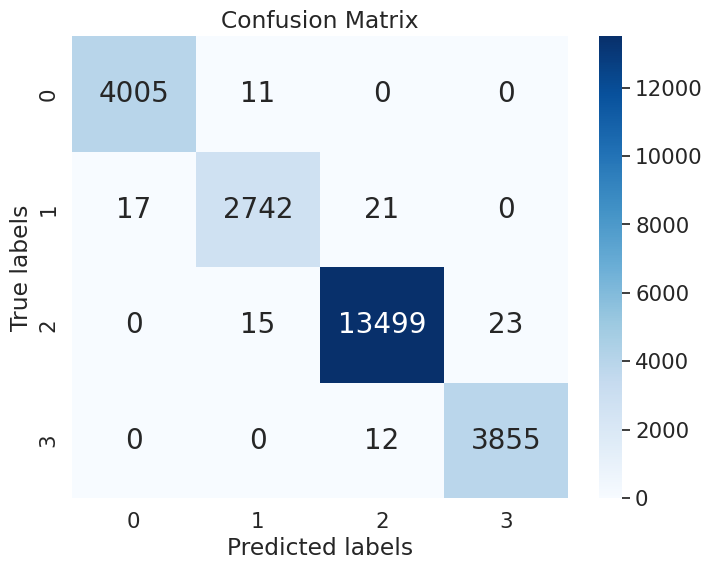

In [ ]:
# Evaluasi model
print(classification_report(y_test, y_predict))

cm = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, annot_kws={"size": 20}, cmap="Blues", fmt='g')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
percentage = model_KNN.score(X_test, y_test)
print(f"accuracy = {percentage*100} %")


accuracy = 99.59090909090908 %


In [ ]:
import matplotlib.pyplot as plt

# Range of k values to test
k_values = range(1, 26)
accuracies = []


In [ ]:
#Split the dataset
X = data.drop('Status Gizi', axis=1)
y = data['Status Gizi']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Calculate accuracy for different k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    accuracies.append(score)


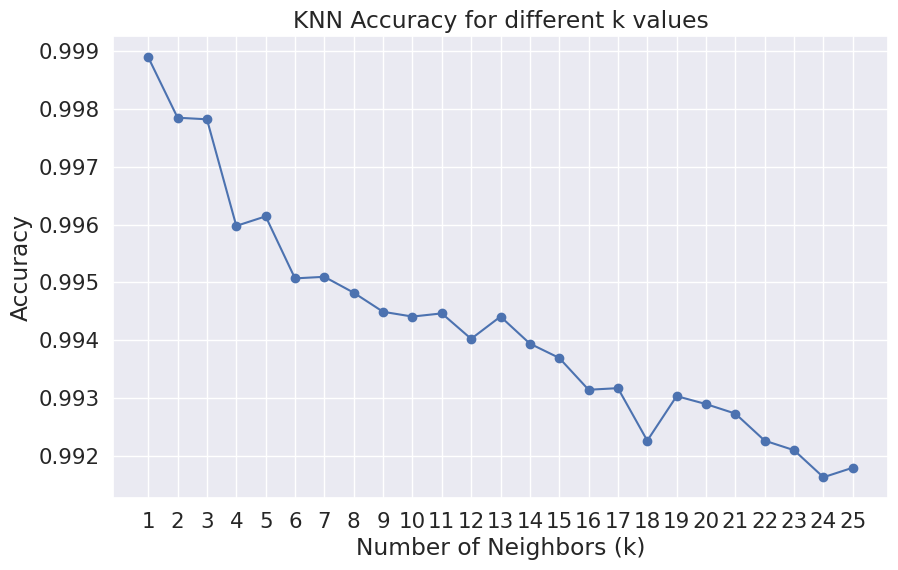

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for different k values')
plt.xticks(k_values)
plt.grid(True)
plt.show()

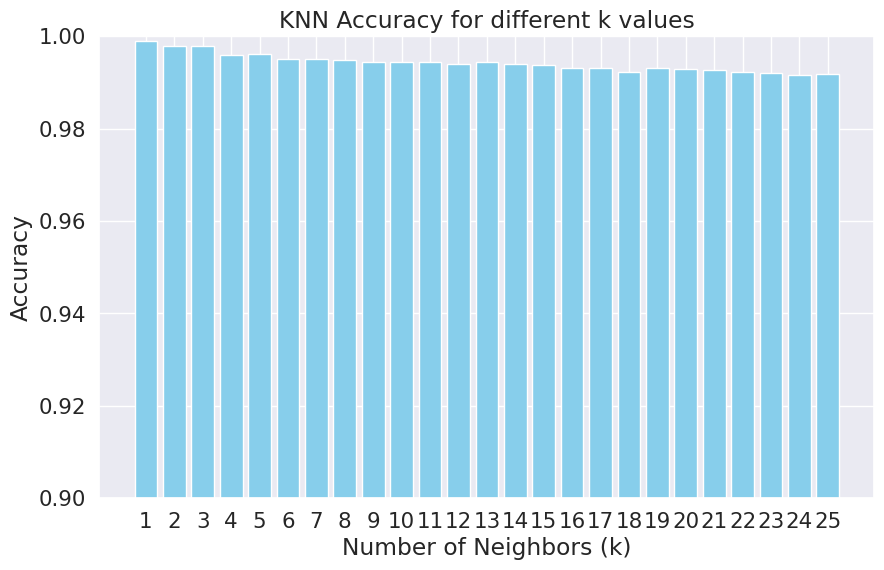

In [ ]:
# Plot the results as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(k_values, accuracies, color='skyblue')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for different k values')
plt.xticks(k_values)
plt.ylim([0.9, 1.0])
plt.grid(True)
plt.show()

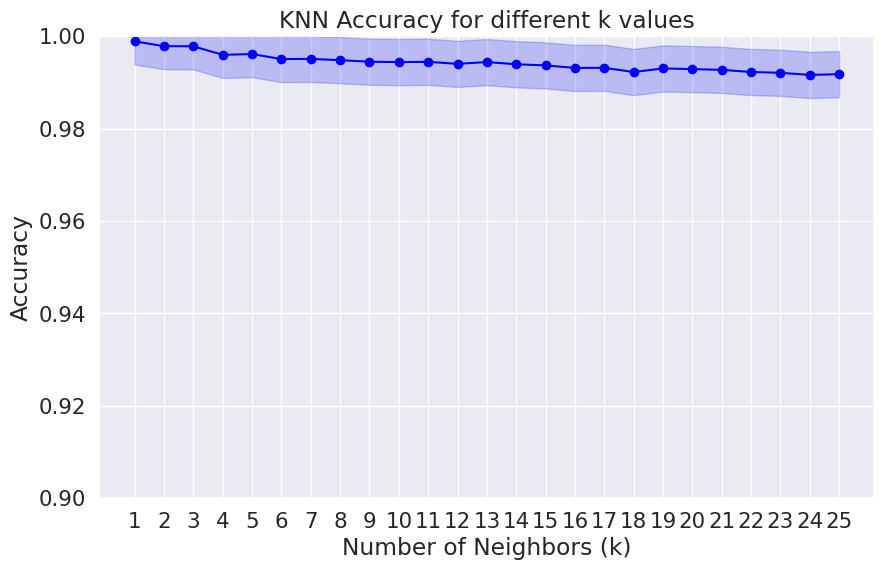

In [ ]:
# Plot the results as a line plot with shaded area
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', color='blue')
plt.fill_between(k_values, np.array(accuracies) - 0.005, np.array(accuracies) + 0.005, color='blue', alpha=0.2)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for different k values')
plt.xticks(k_values)
plt.ylim([0.9, 1.0])
plt.grid(True)
plt.show()

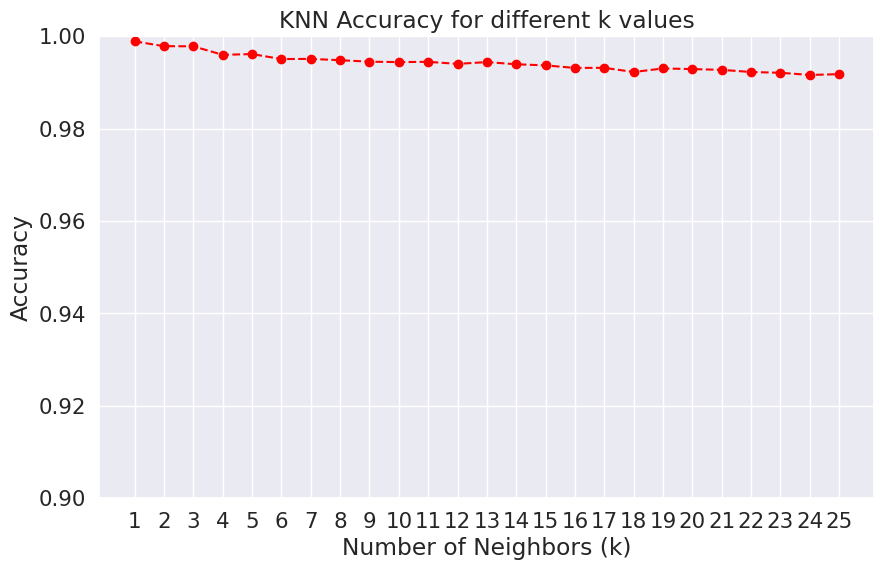

In [ ]:
# Plot the results as a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(k_values, accuracies, color='red')
plt.plot(k_values, accuracies, linestyle='dashed', color='red')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for different k values')
plt.xticks(k_values)
plt.ylim([0.9, 1.0])
plt.grid(True)
plt.show()

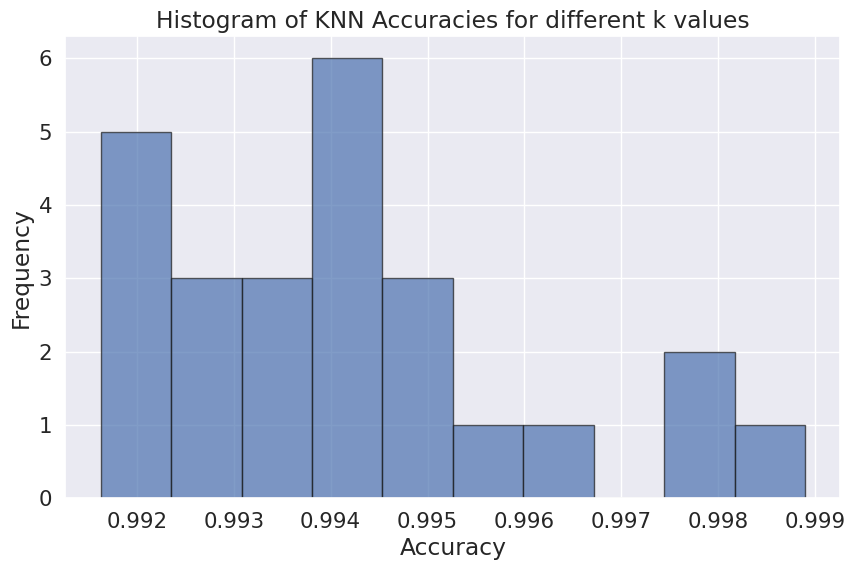

In [ ]:
# Plot the results as a histogram
plt.figure(figsize=(10, 6))
plt.hist(accuracies, bins=10, edgecolor='k', alpha=0.7)
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Histogram of KNN Accuracies for different k values')
plt.grid(True)
plt.show()

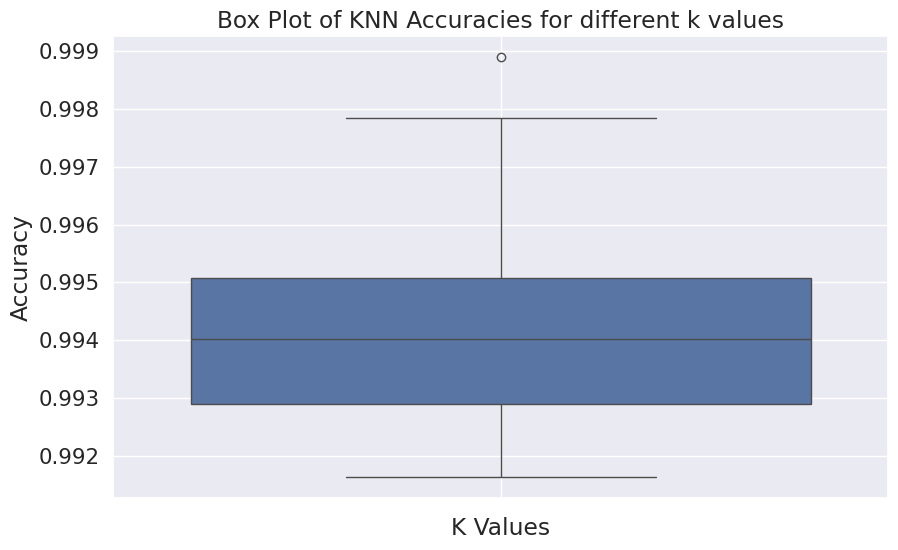

In [ ]:
# Plot the results as a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=accuracies)
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.title('Box Plot of KNN Accuracies for different k values')
plt.grid(True)
plt.show()

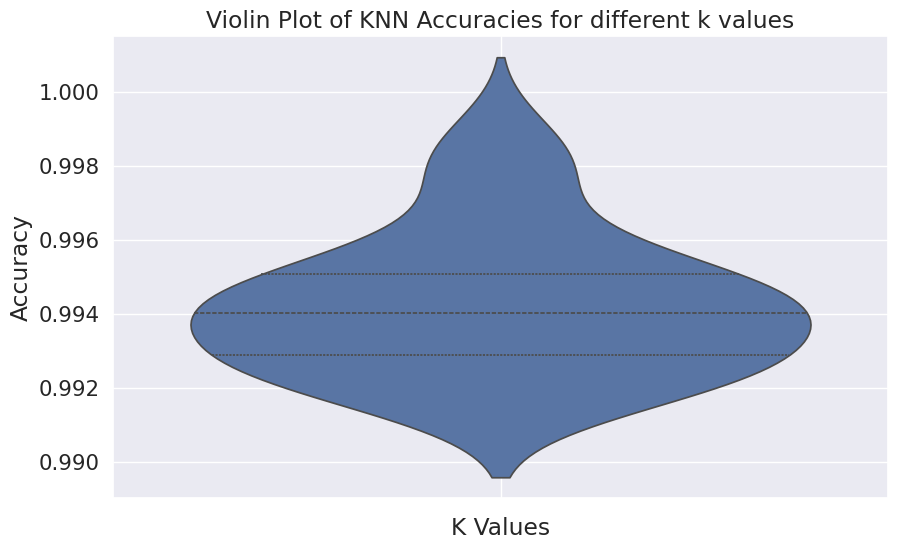

In [ ]:
# Plot the results as a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=accuracies, inner="quartile")
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.title('Violin Plot of KNN Accuracies for different k values')
plt.grid(True)
plt.show()

In [ ]:
# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
import os

# Path untuk menyimpan model
model_directory = '/content/gdrive/MyDrive/Stunting Prediction/Model/'

# Mengecek apakah direktori sudah ada atau belum, jika belum maka buat direktori tersebut
if not os.path.exists(model_directory):
    os.makedirs(model_directory)

# Menyimpan model
model_path = os.path.join(model_directory, 'StuntingPrediction1.pkl')
with open(model_path, 'wb') as model_file:
    pickle.dump(model_KNN, model_file)

print("Model telah disimpan di:", model_path)


Model telah disimpan di: /content/gdrive/MyDrive/Stunting Prediction/Model/StuntingPrediction1.pkl
